**Situation**
한 과일 통조림의 라벨에는 평균 무게가 360g으로 표기되어 있다. 이를 확인하기 위해 30개의 통조림을 무작위로 추출한 후, 무게를 재었더니 평균이 356g 이고, 분산은 100이었다. 유의수준 5%에서 이 통조림의 평균 무게가 라벨과 같은 지를 검정하여라.

In [1]:
# 1. 모듈 호출
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# 2. 가설 설정
print("HO: the mean is 360")
print("H1: the mean is not 360")

HO: the mean is 360
H1: the mean is not 360


In [3]:
# 3. 검정 통계량
pop_mean0 = 360

n = 30
sample_mean = 356
sample_std = np.sqrt(100)
alpha = 0.05

T = (sample_mean - pop_mean0) / (sample_std/np.sqrt(n))
print("T: ", np.round(T, 3))

T:  -2.191


Text(0.5, 1.0, 't-distribution : df = 10')

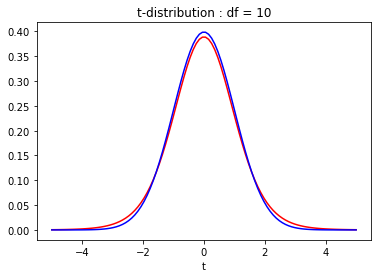

In [4]:
# 4. T분포 형태
x = np.linspace(-5, 5, 100)
y = stats.t(10).pdf(x)
y1 = stats.norm.pdf(x)

plt.plot(x, y, color="red")
plt.plot(x, y1, color="blue")
plt.xlabel("t")
plt.title("t-distribution : df = 10")

In [5]:
# 5. 임계치 구하기
dist_t = stats.t(29)

ll = dist_t.ppf(alpha/2)
ul = dist_t.ppf(1-(alpha/2))

print("critical values are {} and {}".format(np.round(ll,3), np.round(ul,3)))

critical values are -2.045 and 2.045


In [6]:
# 6. 결정
if (np.abs(T) > ul):
    print("Result: we can reject H0")
else:
    print("Result: we accept H0")

Result: we can reject H0


In [7]:
# 7. 효과 크기
cohen = np.abs(sample_mean - pop_mean0)/sample_std

if (cohen >= 1.3):
    print("Effect size: "+str(cohen) + ", Huge effect")
elif (cohen >= 0.8):
    print("Effect size: "+str(cohen) + ", Large effect")
elif (cohen >= 0.5):
    print("Effect size: "+str(cohen) + ", Medium effect")
elif (cohen >= 0.2):
    print("Effect size: "+str(cohen) + ", small effect")
else:
    print("Effect size: "+str(cohen))

Effect size: 0.4, small effect


In [8]:
from scipy.stats import ttest_1samp

samp_data = [356, 370, 360, 366, 345, 340, 369, 382]
ttest_1samp(samp_data, popmean = pop_mean0)

Ttest_1sampResult(statistic=0.20488779977039293, pvalue=0.8434900965628593)